In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## IMDB Dataset

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 2s 0us/step


In [6]:
train_labels[0]

1

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [10]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-04-30 22:00:24.738983: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-30 22:00:24.739109: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"]
)

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                    )

2022-04-30 22:22:54.010777: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
30/30 [==============================] - 2s 25ms/step - loss: 0.5322 - accuracy: 0.7810 - val_loss: 0.3995 - val_accuracy: 0.8710
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8965

2022-04-30 22:22:54.211817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-30 22:22:55.859773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 12ms/step - loss: 0.3201 - accuracy: 0.9030 - val_loss: 0.3197 - val_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2336 - accuracy: 0.9246 - val_loss: 0.2806 - val_accuracy: 0.8929
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1834 - accuracy: 0.9424 - val_loss: 0.2765 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1505 - accuracy: 0.9542 - val_loss: 0.2763 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1265 - accuracy: 0.9602 - val_loss: 0.2932 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1034 - accuracy: 0.9699 - val_loss: 0.3099 - val_accuracy: 0.8846
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0875 - accuracy: 0.9760 - val_loss: 0.3196 - val_accuracy: 0.8841
Epoch 9/20
30/30 [======

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

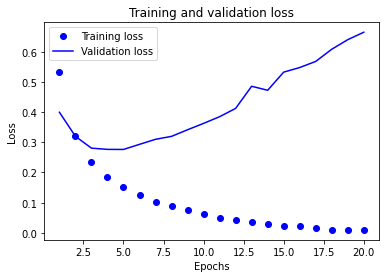

In [20]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


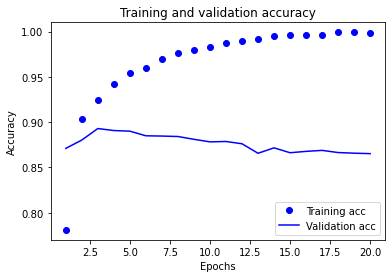

In [21]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
 1/49 [..............................] - ETA: 12s - loss: 0.6927 - accuracy: 0.5410

2022-04-30 22:29:12.351010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 9ms/step - loss: 0.4591 - accuracy: 0.8220
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2654 - accuracy: 0.9087
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2034 - accuracy: 0.9288
Epoch 4/4
 27/782 [>.............................] - ETA: 3s - loss: 0.2687 - accuracy: 0.8912

2022-04-30 22:29:14.609451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.2974 - accuracy: 0.8830


In [24]:
results

[0.2973865866661072, 0.8829600811004639]

In [25]:
model.predict(x_test)

2022-04-30 22:29:55.099894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.14878967],
       [0.9986237 ],
       [0.8742152 ],
       ...,
       [0.07829158],
       [0.05400343],
       [0.46587932]], dtype=float32)

In [56]:
model_test = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_test.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# model_test.build(input_shape=(1, 10000))
# print(model_test.summary())
model_test.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_test.evaluate(x_test, y_test)

Epoch 1/4


2022-04-30 22:44:15.490130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 10ms/step - loss: 0.4683 - accuracy: 0.8202
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2680 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2057 - accuracy: 0.9285
Epoch 4/4
 26/782 [..............................] - ETA: 3s - loss: 0.2957 - accuracy: 0.8858

2022-04-30 22:44:17.751487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.3087 - accuracy: 0.8785


## Classifying newswire: A multiclass classification example

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
len(train_data[10])

31

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [16]:
print(train_data[2][:10])

[1, 53, 12, 284, 15, 14, 272, 26, 53, 959]


In [17]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
max(train_labels)

45

In [29]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-05-01 09:58:40.553856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-01 09:58:40.554084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
model.compile(optimizer="rmsprop",
            loss="categorical_crossentropy",
            metrics=["accuracy"])

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

2022-05-01 10:01:20.067630: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-01 10:01:20.233615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 2.4984 - accuracy: 0.4579 - val_loss: 1.7021 - val_accuracy: 0.6410
Epoch 2/20
13/16 [=======================>......] - ETA: 0s - loss: 1.4461 - accuracy: 0.6931

2022-05-01 10:01:20.651951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 11ms/step - loss: 1.4324 - accuracy: 0.6971 - val_loss: 1.3080 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0782 - accuracy: 0.7739 - val_loss: 1.1468 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8517 - accuracy: 0.8222 - val_loss: 1.0551 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6795 - accuracy: 0.8582 - val_loss: 0.9901 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5468 - accuracy: 0.8851 - val_loss: 0.9452 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4371 - accuracy: 0.9080 - val_loss: 0.9033 - val_accuracy: 0.8160
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3563 - accuracy: 0.9263 - val_loss: 0.9148 - val_accuracy: 0.8050
Epoch 9/20
16/16 [======

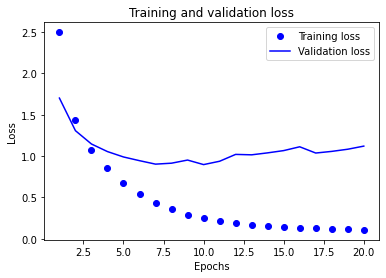

In [34]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

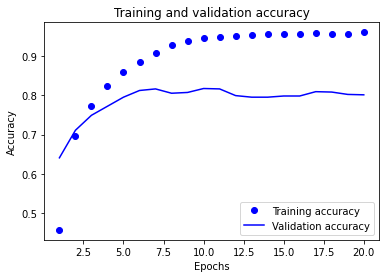

In [35]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
 5/18 [=======>......................] - ETA: 0s - loss: 3.2817 - accuracy: 0.3262

2022-05-01 10:02:29.231456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 12ms/step - loss: 2.4097 - accuracy: 0.4964
Epoch 2/9
18/18 [==============================] - 0s 10ms/step - loss: 1.3357 - accuracy: 0.7148
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 1.0060 - accuracy: 0.7926
Epoch 4/9
18/18 [==============================] - 0s 10ms/step - loss: 0.7884 - accuracy: 0.8365
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6244 - accuracy: 0.8697
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.5004 - accuracy: 0.8956
Epoch 7/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4033 - accuracy: 0.9146
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.3320 - accuracy: 0.9294
Epoch 9/9
25/71 [=========>....................] - ETA: 0s - loss: 0.9386 - accuracy: 0.8012

2022-05-01 10:02:31.075072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 9ms/step - loss: 0.9730 - accuracy: 0.7934


In [38]:
results

[0.973020076751709, 0.7934105396270752]

In [39]:
predictions = model.predict(x_test)

2022-05-01 10:04:13.311505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
predictions[0].shape

(46,)

In [41]:
np.sum(predictions[0])

1.0

In [42]:
np.argmax(predictions[0])

3

In [44]:
type(predictions)

numpy.ndarray

In [47]:
# Introducing a bottleneck
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
 6/18 [=========>....................] - ETA: 0s - loss: 3.7834 - accuracy: 0.0189

2022-05-01 10:08:22.138053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 11ms/step - loss: 3.6929 - accuracy: 0.0470
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 3.4460 - accuracy: 0.1953
Epoch 3/20
18/18 [==============================] - 0s 9ms/step - loss: 3.2438 - accuracy: 0.2247
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: 3.0343 - accuracy: 0.2150
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: 2.8143 - accuracy: 0.3140
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 2.6022 - accuracy: 0.3221
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 2.4139 - accuracy: 0.3596
Epoch 8/20
18/18 [==============================] - 0s 10ms/step - loss: 2.2514 - accuracy: 0.3710
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 2.0828 - accuracy: 0.3790
Epoch 10/20
18/18 [==============================] - 0s 9ms/step - loss: 1.9027 - accuracy: 0.3962
Epoch 11/20
18/18 [=====

2022-05-01 10:08:25.931748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 7ms/step - loss: 1.5649 - accuracy: 0.6598


In [48]:
# 3 layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
 1/18 [>.............................] - ETA: 5s - loss: 3.8146 - accuracy: 0.1055

2022-05-01 10:09:07.158978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 12ms/step - loss: 2.4416 - accuracy: 0.4467
Epoch 2/20
18/18 [==============================] - 0s 11ms/step - loss: 1.4032 - accuracy: 0.6983
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 1.0949 - accuracy: 0.7578
Epoch 4/20
18/18 [==============================] - 0s 11ms/step - loss: 0.8708 - accuracy: 0.8143
Epoch 5/20
18/18 [==============================] - 0s 12ms/step - loss: 0.7032 - accuracy: 0.8461
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5540 - accuracy: 0.8764
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.4526 - accuracy: 0.8986
Epoch 8/20
18/18 [==============================] - 0s 10ms/step - loss: 0.3684 - accuracy: 0.9182
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 0.3025 - accuracy: 0.9356
Epoch 10/20
18/18 [==============================] - 0s 11ms/step - loss: 0.2521 - accuracy: 0.9417
Epoch 11/20
18/18 [=

2022-05-01 10:09:11.318751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 7ms/step - loss: 1.3390 - accuracy: 0.7747


## Predicting House Prices

In [49]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

65536/57026 [==================================] - 0s 0us/step


In [50]:
train_data.shape

(404, 13)

In [51]:
test_data.shape

(102, 13)

In [52]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [54]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean
test_data /= std

In [55]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [59]:
# Using K-fold validation

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[ : i * num_val_samples],
            train_data[(i + 1) * num_val_samples : ]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[ : i * num_val_samples],
            train_targets[(i + 1) * num_val_samples : ]
        ],
        axis=0
    )
    model = build_model()
    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs = num_epochs,
        batch_size=16,
        verbose=0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)



Processing fold #0


2022-05-01 12:58:02.518289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 12:58:11.329702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-05-01 12:58:11.827220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 12:58:20.030802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 12:58:20.199080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-05-01 12:58:28.427822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 12:58:28.596686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-05-01 12:58:36.935392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [58]:
print(all_scores)
np.mean(all_scores)

[2.003744125366211, 2.625230550765991, 2.4711074829101562, 2.524289131164551]


2.4060928225517273

In [63]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[ : i * num_val_samples],
            train_data[(i + 1) * num_val_samples : ]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[ : i * num_val_samples],
            train_targets[(i + 1) * num_val_samples : ]
        ],
        axis=0
    )
    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs = num_epochs,
        batch_size=16,
        verbose=0
    )
    mae_history = history.history["val_mae"]    
    all_mae_histories.append(mae_history)


Processing fold #0


2022-05-01 13:08:48.146331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 13:08:48.495099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-05-01 13:09:40.926351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 13:09:41.286313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-05-01 13:10:34.267658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 13:10:34.528161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-05-01 13:11:29.818721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-01 13:11:30.103554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [64]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

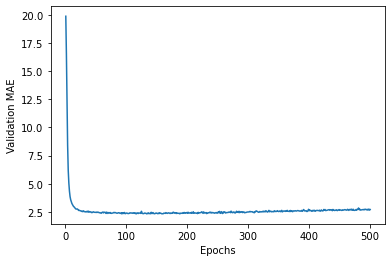

In [65]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

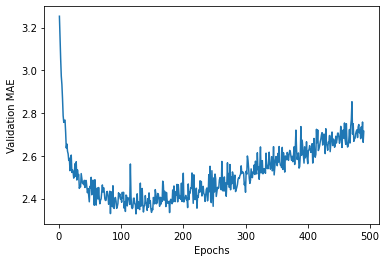

In [66]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [67]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2022-05-01 13:13:38.155807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 22ms/step - loss: 18.2646 - mae: 2.6314


2022-05-01 13:13:53.324520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [69]:
predictions = model.predict(test_data)
predictions[0]


array([8.61258], dtype=float32)